<a href="https://colab.research.google.com/github/Aashish893/Data-Warehousing/blob/main/DWM_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import sklearn.preprocessing as pp
import statsmodels.api as sm
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn.linear_model as lm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv("data.csv")
data.shape

(4600, 18)

In [ ]:
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426


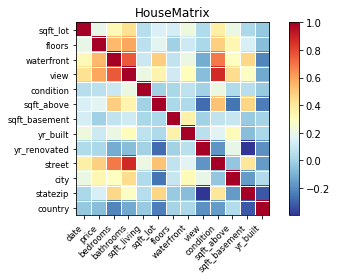

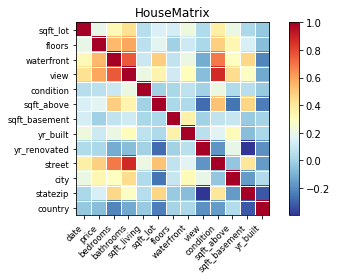

In [ ]:
#Creating Correlation matrix [Color Grid]

sm.graphics.plot_corr(data.corr(), xnames=data.columns, title="HouseMatrix")

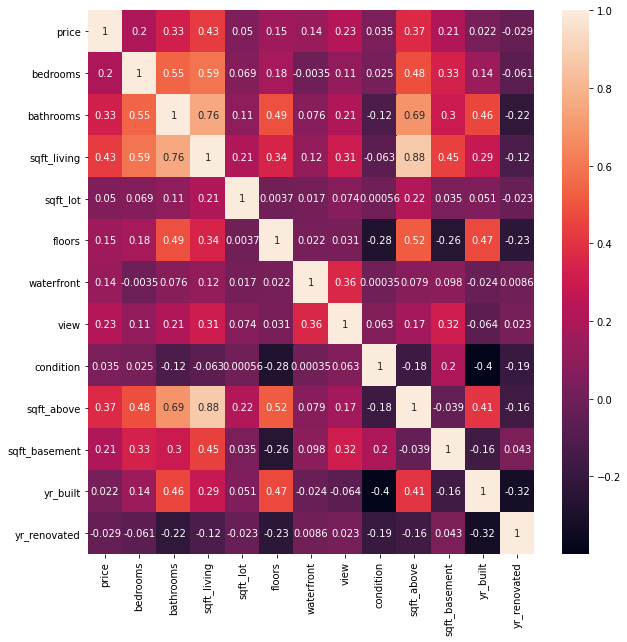

In [ ]:
#Corelation Matrix using Seaborn
fig , ax = plt.subplots(figsize=(10,10))
sb.heatmap(data.corr(),annot = True, ax = ax)


Price Range From 0.0  -  26590000.0
Bedrooms Range From 0.0  -  9.0


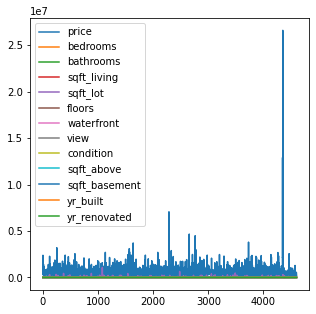

In [ ]:
data.plot(figsize=(5,5))
print("Price Range From",data.price.min()," - ",data.price.max() )
print("Bedrooms Range From",data.bedrooms.min()," - ",data.bedrooms.max() )

In [ ]:
#Transformation using Standardisation
X = data["price"]
Xmean =  X.mean()
Xstd = X.std()
Xnorm = (X-Xmean)/Xstd
Xstd,Xmean,Xnorm

(563834.7025471417, 551962.9884732141, 0      -0.423817
 1       3.249245
 2      -0.372384
 3      -0.234046
 4      -0.003481
           ...   
 4595   -0.432390
 4596   -0.031267
 4597   -0.239536
 4598   -0.618201
 4599   -0.587695
 Name: price, Length: 4600, dtype: float64)

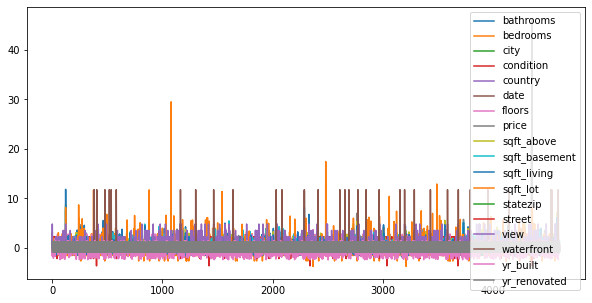

In [ ]:
#Standardisation of Data
standard_data = (data -data.mean())/data.std()

#Pllotting Standardised data
standard_data.plot(figsize=(10,5))

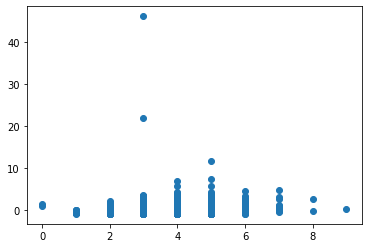

In [ ]:
plt.scatter(data["bedrooms"],standard_data["price"])

In [ ]:
numerical = [var for var in standard_data.columns if standard_data[var].dtype!='O']
categorical = [var for var in standard_data.columns if standard_data[var].dtype=='O']
ss = pp.StandardScaler()
ss.fit_transform(data[numerical])

array([[-0.84320364, -0.44112227, -0.6671122 , ..., -0.08500441,
        -0.53101376,  1.22167046],
       [ 0.43280154,  1.75970468,  2.28641631, ..., -0.08500441,
        -1.67469295, -0.82569345],
       [-0.20520105, -0.44112227,  0.80965205, ..., -0.08500441,
        -0.1609999 , -0.82569345],
       ...,
       [ 0.43280154, -0.44112227, -0.6671122 , ..., -0.08500441,
         1.2854179 , -0.82569345],
       [-0.20520105,  0.6592912 , -0.6671122 , ..., -0.08500441,
         0.10810108, -0.82569345],
       [ 0.43280154, -0.44112227,  0.80965205, ..., -0.08500441,
         0.64630305, -0.82569345]])

In [ ]:
#Transform using Min-Max Scaler
norm_data = (data[numerical] -data[numerical].min())/(data[numerical].max() - data[numerical].min())
norm_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,0.011771,0.333333,0.18750,0.073652,0.006775,0.2,0.0,0.0,0.50,0.107301,0.000000,0.482456,0.995531
1,0.089658,0.555556,0.31250,0.249051,0.007835,0.4,0.0,1.0,1.00,0.331858,0.058091,0.184211,0.000000
2,0.012862,0.333333,0.25000,0.118451,0.010534,0.0,0.0,0.0,0.75,0.172566,0.000000,0.578947,0.000000
3,0.015795,0.333333,0.28125,0.123766,0.006885,0.0,0.0,0.0,0.75,0.069690,0.207469,0.552632,0.000000
4,0.020684,0.444444,0.31250,0.119210,0.009186,0.0,0.0,0.0,0.75,0.085177,0.165975,0.666667,0.989076
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.011590,0.333333,0.21875,0.086560,0.005330,0.0,0.0,0.0,0.75,0.126106,0.000000,0.473684,0.982622
4596,0.020095,0.333333,0.31250,0.082764,0.006460,0.4,0.0,0.0,0.50,0.120575,0.000000,0.728070,0.997517
4597,0.015679,0.333333,0.31250,0.200456,0.005939,0.4,0.0,0.0,0.50,0.292035,0.000000,0.956140,0.000000
4598,0.007649,0.444444,0.25000,0.130600,0.005581,0.0,0.0,0.0,0.50,0.077434,0.211618,0.649123,0.000000


In [ ]:
print("Price Range From",norm_data.price.min()," - ",norm_data.price.max() )
print("Bedrooms Range From",norm_data.bedrooms.min()," - ",norm_data.bedrooms.max() )

Price Range From 0.0  -  1.0
Bedrooms Range From 0.0  -  1.0


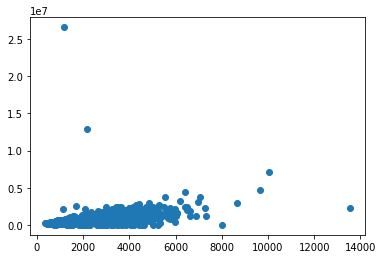

In [ ]:
plt.scatter(data["sqft_living"],data["price"])

In [ ]:
# Detecting and Filling NaN or null data values in the modified Dataset
standard_data[numerical].fillna(method="bfill" ,inplace=True)
standard_data[numerical].isnull().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


bathrooms        0
bedrooms         0
condition        0
floors           0
price            0
sqft_above       0
sqft_basement    0
sqft_living      0
sqft_lot         0
view             0
waterfront       0
yr_built         0
yr_renovated     0
dtype: int64

In [ ]:
#Independent Variable = X Dependent Variable = Y

Y = data["price"]
X = data[numerical]
del X["price"]

In [ ]:
#Regression Equation
regression = sm.OLS(Y,X)

In [ ]:
#Training the model
#Calculating values of attributes using actual values of dependent and independent variables
#For Regression - Calculate values of coefficient and intercept using values of X and Y

In [ ]:
# Step 1 : Train model

model = regression.fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.597
Model:                            OLS   Adj. R-squared (uncentered):              0.596
Method:                 Least Squares   F-statistic:                              617.3
Date:                Mon, 17 May 2021   Prob (F-statistic):                        0.00
Time:                        06:01:33   Log-Likelihood:                         -66900.
No. Observations:                4600   AIC:                                  1.338e+05
Df Residuals:                    4589   BIC:                                  1.339e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bathrooms      2.464e+04   1.64e+04      1.505      0.132   -7461.473    5.67e+04
bedrooms      -5.239e+04   1.05e+04     -4.985      0.000    -7.3e+04   -3.18e+04
condition       7.19e+04   1.16e+04      6.175      0.000    4.91e+04    9.47e+04
floors         3.345e+04   1.88e+04      1.783      0.075   -3337.718    7.02e+04
sqft_above       89.5340      9.695      9.235      0.000      70.527     108.541
sqft_basement    80.1203     13.592      5.895      0.000      53.473     106.767
sqft_living     169.6542      9.793     17.323      0.000     150.454     188.854
sqft_lot         -0.7074      0.214     -3.310      0.001      -1.126      -0.288
view           5.155e+04    1.1e+04      4.694      0.000       3e+04    7.31e+04
waterfront     3.695e+05   9.42e+04      3.923      0.000    1.85e+05    5.54e+05
yr_built       -101.8530     30.139     -3.379      0.001    -160.940     -42.766
yr_renovated     27.4594      8.088      3.395      0.001      11.602      43.316
==============================================================================
Omnibus:                    12754.816   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        570591831.555
Skew:                          34.868   Prob(JB):                         0.00
Kurtosis:                    1726.989   Cond. No.                     7.11e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.37e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
data["PredictedPrice"] = model.predict(X)
data[["price","sqft_living","PredictedPrice"]]

,price,sqft_living,PredictedPrice
0,3.130000e+05,1340,3.433365e+05
1,2.384000e+06,3650,1.173631e+06
2,3.420000e+05,1930,5.047208e+05
3,4.200000e+05,2000,5.226865e+05
4,5.500000e+05,1940,5.144199e+05
...,...,...,...
4595,3.081667e+05,1510,4.492184e+05
4596,5.343333e+05,1460,4.133035e+05
4597,4.169042e+05,3010,7.576265e+05
4598,2.034000e+05,2090,4.152480e+05


Text(0.5, 1.0, 'Comparing Actual vs Predicted price')

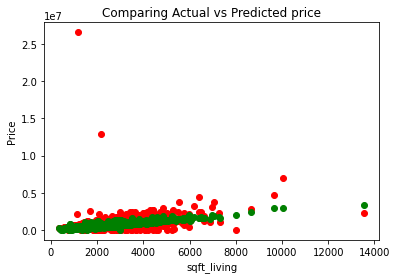

In [ ]:
#Comparing actual and predicted price
plt.scatter(data["sqft_living"],data["price"],color = "red")
plt.scatter(data["sqft_living"],data["PredictedPrice"],color = "green")
plt.xlabel("sqft_living")
plt.ylabel("Price")
plt.title("Comparing Actual vs Predicted price")

In [ ]:
#AI Console App
user_data={}
for column in X.columns:
  temp_val = int(input("Enter "+column+" : "))
  user_data[column] = temp_val
user_data

input_data = pd.DataFrame(data = user_data,index = [0])
output = model.predict(input_data)
print("Price of the house is : ",output)

Enter bedrooms : 1
Enter bathrooms : 2
Enter sqft_living : 600
Enter sqft_lot : 600
Enter floors : 1
Enter waterfront : 0
Enter view : 1
Enter condition : 1
Enter sqft_above : 600
Enter sqft_basement : 600
Enter yr_built : 1975
Enter yr_renovated : 0
Price of the house is :  0    155801.40454
dtype: float64
